In [1]:
import pandas as pd

In [2]:
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
from sklearn import svm

In [4]:
import itertools

In [5]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [6]:
import seaborn

In [7]:
%matplotlib inline

In [8]:
data=pd.read_csv('creditcard.csv')

In [9]:
df=pd.DataFrame(data)
df.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=0)

In [12]:
classifier=svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [14]:
Prediction_SVM=classifier.predict(x_test)


In [16]:
cm = confusion_matrix(y_test,Prediction_SVM)

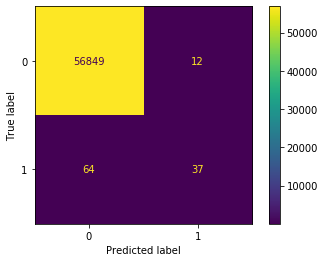

In [17]:
plot_confusion_matrix(classifier,x_test,y_test,values_format='d')

In [18]:
print('I have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('So, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))
print("The misclassification rate is : "+str((cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))
print('Precision :'+str(cm[1][1]/(cm[0][1]+cm[1][1])))

I have detected 37 frauds / 101 total frauds.
So, the probability to detect a fraud is 0.36633663366336633
the accuracy is : 0.9986657771847899
The misclassification rate is : 0.00133422281521014
Precision :0.7551020408163265


In [13]:
df_fraud=df[df['Class']==1]

Text(0.5, 0, 'Time')

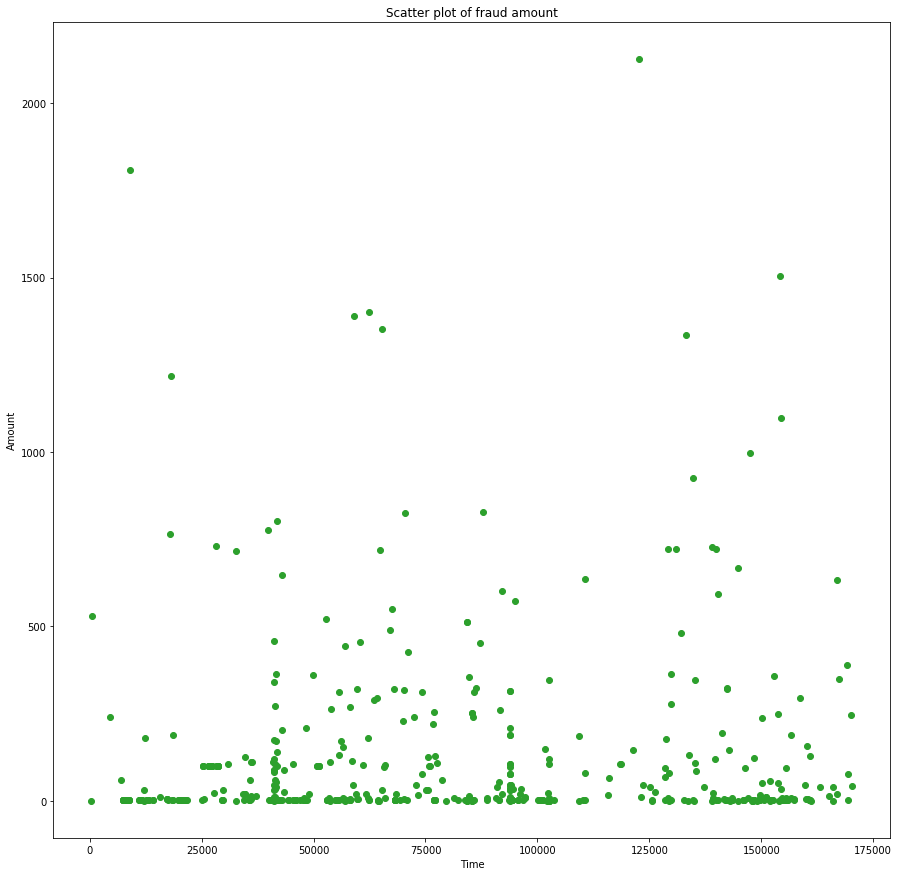

In [15]:
plt.figure(figsize=(15,15))
plt.scatter(df_fraud['Time'],df_fraud['Amount'],c='#2ca02c')
plt.title('Scatter plot of fraud amount')
plt.ylabel('Amount')
plt.xlabel('Time')

In [16]:
Big_fraud=df_fraud[df_fraud['Amount']>1200].shape[0]

In [17]:
Big_fraud

8

In [18]:
print('There are only '+ str(Big_fraud)+' fraud out of '+str(df_fraud.shape[0])+' where the amount is more than 1200')

There are only 8 fraud out of 492 where the amount is more than 1200


# Most of fraud happened at small amount

In [19]:
Fraud_data=len(data[data.Class==1])
NonFraud_data=len(data[data.Class==0])
print('There are only '+str(Fraud_data)+' fraud records in the original dataset and '+str(NonFraud_data)+' non fraud records')

There are only 492 fraud records in the original dataset and 284315 non fraud records


In [20]:
Accuracy=(NonFraud_data-Fraud_data)/NonFraud_data

In [21]:
print('The accuracy of the classifier '+str(Accuracy))

The accuracy of the classifier 0.998269524998681


In [22]:
dfcor=df.corr()

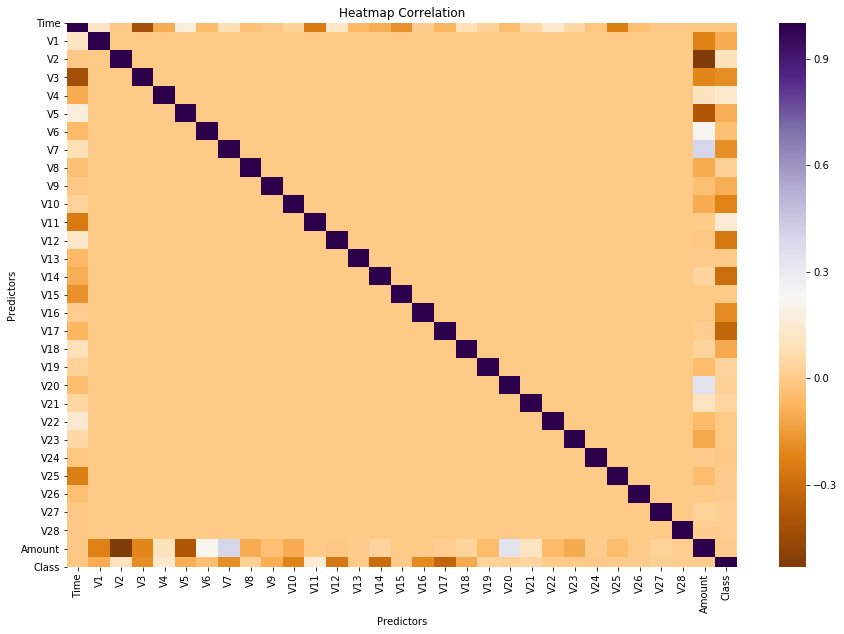

In [23]:
plt.figure(figsize=(15,10))
seaborn.heatmap(dfcor,cmap='PuOr')
plt.title('Heatmap Correlation')
plt.xlabel('Predictors')
plt.ylabel('Predictors')
plt.show()

In [24]:
corrclass=dfcor['Class']
corrclass

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

In [25]:
rank=pd.DataFrame(corrclass)

In [26]:
rank=np.abs(rank).sort_values(by='Class',ascending=False)

In [27]:
rank.dropna(inplace=True)

# We separate our data into train and test data

In [28]:
df_train_all=df[0:150000]

In [29]:
df_train_1=df_train_all[df_train_all['Class']==1]

In [30]:
df_train_0=df_train_all[df_train_all['Class']==0]

In [31]:
print('In this train data, we have '+str(len(df_train_1))+' fraud records so we need to take same number of non fraud records')

In this train data, we have 293 fraud records so we need to take same number of non fraud records


In [32]:
train_0=df_train_0.sample(300)

In [33]:
df_train=df_train_1.append(train_0)

In [34]:
train_data=df_train.sample(frac=1)

# We are going to drop Class and Time variables from the dataset because they are useless variables.

In [35]:
x_train=train_data.drop(['Time','Class'],axis=1)

In [36]:
y_train=train_data['Class']

In [37]:
x_train=np.asarray(x_train)

In [38]:
y_train=np.asarray(y_train)

In [39]:
df_test_all=df[150000:]
x_test=df_test_all.drop(['Time','Class'],axis=1)

In [40]:
y_test=df_test_all['Class']

In [41]:
x_test=np.asarray(x_test)

In [42]:
y_test=np.asarray(y_test)

In [43]:
x_train_rank=train_data[rank.index[1:11]]

In [44]:
x_train_rank=np.asarray(x_train_rank)

In [45]:
x_test_rank=df_test_all[rank.index[1:11]]

In [46]:
x_test_rank=np.asarray(x_test_rank)

In [47]:
y_test=np.asarray(y_test)

# Confusion Matrix

In [48]:
Class_Names=np.array(['0','1'])

In [49]:
classifier=svm.SVC(kernel='linear')

In [50]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [51]:
prediction_svm_all=classifier.predict(x_test)

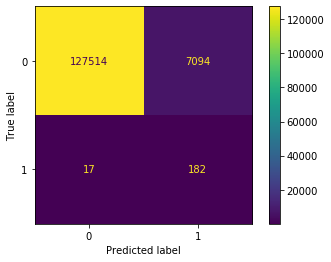

In [52]:
cm = confusion_matrix(y_test,prediction_svm_all)
plot_confusion_matrix(classifier,x_test,y_test,values_format='d')

In [53]:
print('I have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('So, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))
print("The misclassification rate is : "+str((cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))
print('Precision :'+str(cm[1][1]/(cm[0][1]+cm[1][1])))

I have detected 182 frauds / 199 total frauds.
So, the probability to detect a fraud is 0.914572864321608
the accuracy is : 0.9472505136973599
The misclassification rate is : 0.05274948630264007
Precision :0.025013743815283124


# Train model with correlation rank

In [54]:
classifier.fit(x_train_rank,y_train)
prediction_rank_all=classifier.predict(x_test_rank)

[[129598   5010]
 [    18    181]]


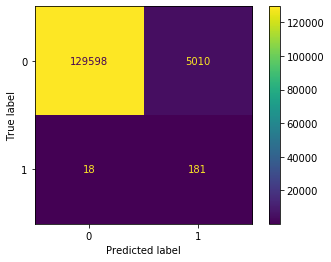

In [55]:
cm=confusion_matrix(y_test,prediction_rank_all)
print(cm)
plot_confusion_matrix(classifier,x_test_rank,y_test)

In [56]:
print('I have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('So, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))
print("The misclassification rate is : "+str((cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))
print('Precision :'+str(cm[1][1]/(cm[0][1]+cm[1][1])))

I have detected 181 frauds / 199 total frauds.
So, the probability to detect a fraud is 0.9095477386934674
the accuracy is : 0.962702233563539
The misclassification rate is : 0.037297766436461016
Precision :0.03486804083991524
